<img src="https://www.universidades.com.ec/logos/original/logo-universidad-politecnica-salesiana.png" style="margin: 0 auto"/>

<h1 style="text-align:center;color: darkblue">Análisis de Datos FIFA Players</h1>

<ul style="text-align:center;list-style:none">
    <li><strong>Autor: </strong> Bryam David Vega Moreno</li>
    <li><strong>Maestro: </strong> Diego Quisi</li>
    <li><strong>Materia: </strong> Simulación</li>
    <li><strong>Universidad: </strong> Universidad Politécnica Salesiana</li>
    <li><strong>Carrera: </strong> Ciencias de la computación</li>
</ul>

---------------------------------------------

<h2 style="color:yellowgreen">Introducción</h2>

En este informe presentamos el uso de librerias para visualización. Si bien matplotlib es una de las librerias más populares para la impresión de gráficos en python, actualmente existen nuevas librerias que permiten realizar un mejor desempeño en cuanto a graficas se refiere. En esta ocasión presentamos dos librerias llamadas plotly y altair las cuales permiten realizar gráficos con interacción, a su vez estas se estan volviendo populares debido a su diseño y facilidad de uso al momento de utiliar dichas librerias. Esta es una alternativa nueva para viejas librerias como matplotlib. 

Los datos que tenemos para realizar las gráficas son sacadas de la página <a href='https://data.world/raghav333/fifa-players'> data.world</a> la cual contiene información de los jugadores fifa con sus respectivas características.

-------------------------------------

<h2 style="color:yellowgreen">Librerias a importar</h2>

**Para análisis de datos**

In [8]:
import pandas as pd

**Para gráficos**

In [9]:
import altair as alt
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

----------------------------------

<h2 style="color:yellowgreen">Lectura de datos</h2>

Mediante la libreria de **pandas** podremos realizar la lectura del conjunto de datos que tenemos y a la vez poder realizar algunas operaciones que pandas nos ofrece con su potencialidad. 

In [10]:
df = pd.read_csv('./in/fifa.csv')
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


Una vez leido los datos, procedemos a realizar los análisis planteados para esta tarea

----------------------

<h2 style="color:yellowgreen">Análisis de datos</h2>

<h4 style="color:orange">Primer enunciado:</h4>
<strong>Con los datos FIFA, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un caudro tipo PIE</strong>

* **Debajo de 125 lbs**
* **125-150**
* **150-175**
* **175 o superior**

 <h5 style="color:red">Solución</h5>

Primera debemos tomar en cuenta que el conjunto de datos tiene los pesos en kgs por lo cual tenemos que hacer una conversión de kgs a lbs. A continuación mostramos el procedimiento para realizarlo

In [11]:
df['weight_lbs'] = df['weight_kgs']*2.20462
df[['weight_lbs','weight_kgs']].head()

,weight_lbs,weight_kgs
0,158.953102,72.1
1,167.992044,76.2
2,184.967618,83.9
3,130.072580,59.0
4,195.990718,88.9


Con dicha conversión pcedemos a crear un pequeño dataset con las escalas que se han específicado, con la finalidad de graficarlo con un PIE.

In [12]:
dict_weight = {'weight_lbs':['<125','>=125 and <150','>=150 and <175','>=175'],
               'values':[df.query('weight_lbs <125').count()[0]/len(df),
                         df.query('weight_lbs >=125 and weight_lbs < 150 ').count()[0]/len(df),
                        df.query('weight_lbs >=150 and weight_lbs < 175 ').count()[0]/len(df)
                         ,df.query('weight_lbs >=175').count()[0]/len(df)]}
df_weight=pd.DataFrame(dict_weight)
df_weight

,weight_lbs,values
0,<125,0.002005
1,>=125 and <150,0.163752
2,>=150 and <175,0.558928
3,>=175,0.275315


Una vez creado el conjunto de datos con las escalas correspondientes, procedemos a graficarlo utilizando la librería plotly que tiene la potencialidad de generar **graficos pastel** muy buenos. A continuación mostramos el resultado

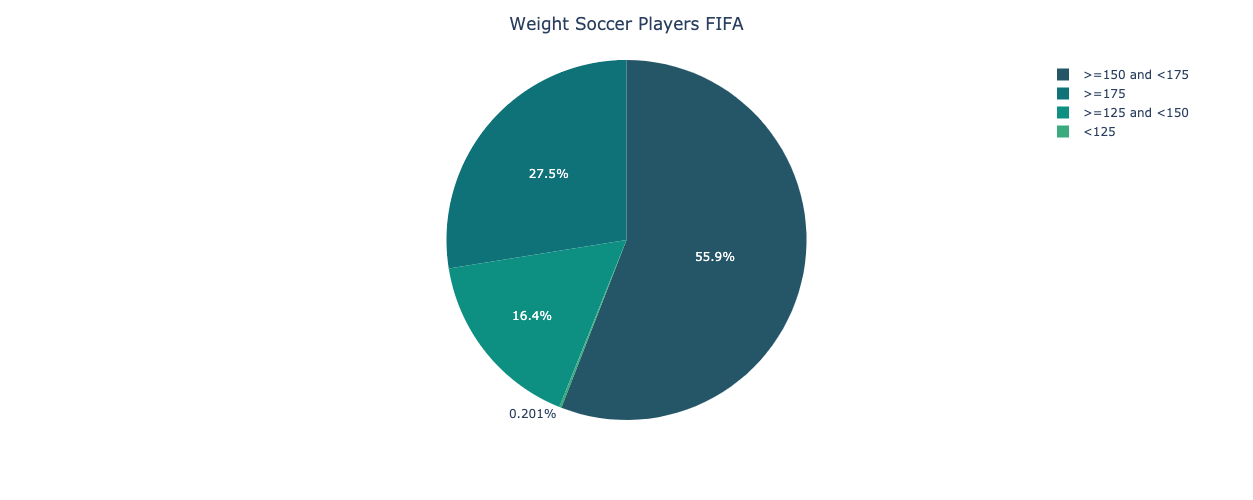

In [13]:
fig = px.pie(df_weight, values="values",
             names="weight_lbs", 
             color_discrete_sequence=px.colors.sequential.Aggrnyl,width=500,height=500)
fig.update_layout(title_text='Weight Soccer Players FIFA', title_x=0.5)

En dicho gráfico podemos notar que la mayoría de jugadores estan entre un peso de 150 a 169 lbs, le sigue el peso de 175 lbs o superior y en tercero lugar tenermos a los jugadores que pesan entre 125 y 150. Por ultimo lugar y con casi nada del porcentaje, tenemos a jugadores que pesan menos de 125 lbs lo cual representa un 0.20% del total de datos.

<h4 style="color:orange">Segundo enunciado:</h4>
<strong>Generar un gráfico de barras (histograma) de acuerdo a su habilidad (overall) en base a los siguientes segmentos contando el número de jugadores:</strong>

* **40**
* **50**
* **60**
* **70**
* **80**
* **90**
* **100**

 <h5 style="color:red">Solución</h5>

Para este enunciado se utiliza el poder de pandas utilizando la función groupby con la finalidad de agrupar los datos por su overall y hacer un count de cada uno de dichos valores y así obtener el count de cada overall. A continuación se muestra el resultado

In [6]:
df_overall = pd.DataFrame(df.groupby(['overall_rating'])['overall_rating'].count())
df_overall.columns = ['count']
df_overall.reset_index(inplace=True)
df_overall.head()

,overall_rating,count
0,47,21
1,48,33
2,49,45
3,50,98
4,51,120


Por ultimo, una vez realizado el groupby y obtenido los resultados, procedemos a graficar el histograma tomando en cuenta los segmentos especificados en el enunciado. Con la libraría altair, es muy facil gráficar de una manera interactiva el histograma y ademas de ello se tiene un mejor diseño a comparación de la libreria matplotlib.

In [7]:
alt.Chart(df_overall.melt('overall_rating')).mark_bar().encode(
    x=alt.X('overall_rating',bin=alt.Bin(maxbins=5),title='Overall'),
    y=alt.Y('value',title='count'),
    color=alt.Color('variable',scale=alt.Scale(domain=['count'],range=['orange']))
).properties(title='Overall rating').interactive()

alt.Chart(...)